<a href="https://colab.research.google.com/github/fakhar-iqbal/Machine_Learning_Fundamentals/blob/main/Regression_in_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Regression in Pytorch**

## In this notebook,we use pytorch auto differentiation library to fit a straight line to data points. Thus here we use calculus to slve the same regression problem that we used in LA-2

In [1]:
import torch
import matplotlib.pyplot as plt


In [2]:
x = torch.tensor([0,1,2,3,4,5,6,7.])
x

tensor([0., 1., 2., 3., 4., 5., 6., 7.])

## The y values were created using the equation y = mx +b. This way, we know what model parameters to be learned are, say, m = -0.5, b= 2. Random, normally-distributed noise has been added to simualte sampling error

In [3]:
y = torch.tensor([1.86,1.31,0.62, 0.33, 0.09, -0.67, -1.23,-1.37])
y

tensor([ 1.8600,  1.3100,  0.6200,  0.3300,  0.0900, -0.6700, -1.2300, -1.3700])

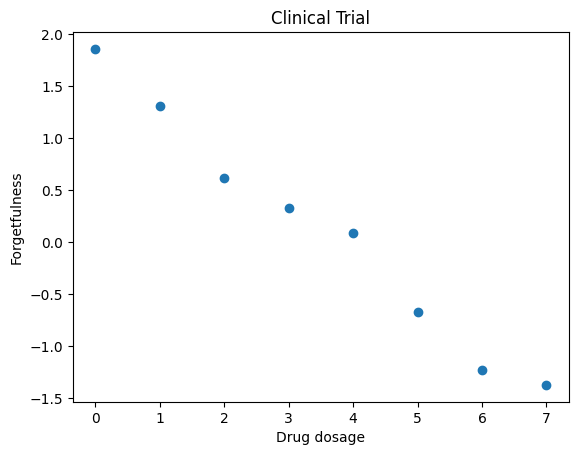

In [4]:
fig,ax = plt.subplots()
plt.title('Clinical Trial')
plt.xlabel('Drug dosage')
plt.ylabel('Forgetfulness')

_  = ax.scatter(x,y)

## Initialize the random value for m slope with 0.9

In [5]:
m = torch.tensor([0.9]).requires_grad_()
m

tensor([0.9000], requires_grad=True)

## .. and do the same fo y-intercpt b

In [6]:
b = torch.tensor([0.1]).requires_grad_()
b

tensor([0.1000], requires_grad=True)

In [24]:
def regression_plot(myx,myy,myb,mym):
  fig,ax = plt.subplots()

  ax.scatter(myx,myy)

  xmin,xmax = ax.get_xlim()
  ymin,ymax = mym.detach().numpy()*xmin + myb.detach().numpy() , mym.detach().numpy()*xmax + myb.detach().numpy()   ### detached here to use it in numpy. numpy needs no tracking tensors

  ax.set_xlim([xmin,xmax])
  ax.plot([xmin,xmax],[ymin,ymax])

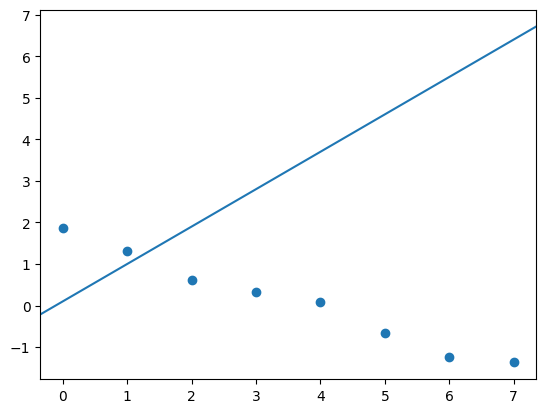

In [25]:
regression_plot(x,y,b,m)

In [26]:
def regression(myx,myb,mym):
  return myx*mym + myb

##**Machine Learning in Four Steps**

###**Step 1: Forward Pass**

In [29]:
yhat = regression(x,b,m)
yhat

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)

###**Step 2: Compare yhat with true y to calculate the cost C**

There is a **MSELoss** in pytorch, but lets define it ourselves to see how it works.
$$C = \frac{1}{n} \sum_{i=1}^n (\hat{y_i}-y_i)^2 $$

we square it jut bcz we want small losses to be ignored and larger losses to be in focus which will increase exponentially

In [30]:
def mse(myhat,myy):
  sigma = torch.sum((myhat - myy)**2)
  return sigma/len(myy)

In [31]:
C = mse(yhat,y)
C

tensor(19.6755, grad_fn=<DivBackward0>)

###**Step 3: Use Autodiff to calculate gradient of C wrt parameters**

In [32]:
C.backward()

In [33]:
m.grad

tensor([36.3050])

In [34]:
b.grad

tensor([6.2650])

###**Step 4: Gradient Descent**

In [36]:
optimiz = torch.optim.SGD([m,b],lr=0.01)

In [37]:
optimiz.step()

In [38]:
m

tensor([0.5369], requires_grad=True)

In [39]:
b

tensor([0.0374], requires_grad=True)

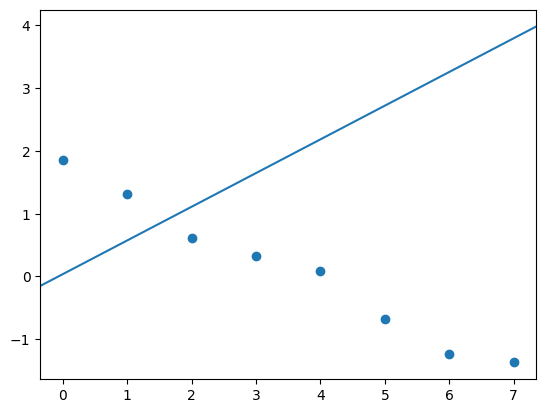

In [40]:
regression_plot(x,y,b,m)

In [41]:
C = mse(regression(x,b,m),y)
C

tensor(8.5722, grad_fn=<DivBackward0>)

##Put these four steps into a loop to iteratively reduce the loss/cost

In [42]:
epochs = 1000
for epoch in range(epochs):
  optimiz.zero_grad()   ## reset gradients to zero, otherwise they accumulate

  yhat = regression(x,b,m)   ####  STEP 1
  C = mse(yhat,y)     ##### STEP 2

  C.backward()   ####### STEP 3

  optimiz.step()   ####### STEP 4

  print('Epoch {}, Cost {}, m grad {}, b grad {}, '.format(epoch,'%.3g'%C.item(), '%.3g'%m.grad,'%.3g'%b.grad))

Epoch 0, Cost 8.57, m grad 23.2, b grad 3.6, 
Epoch 1, Cost 4.08, m grad 14.8, b grad 1.91, 
Epoch 2, Cost 2.25, m grad 9.49, b grad 0.831, 
Epoch 3, Cost 1.51, m grad 6.11, b grad 0.15, 
Epoch 4, Cost 1.2, m grad 3.96, b grad -0.28, 
Epoch 5, Cost 1.07, m grad 2.59, b grad -0.552, 
Epoch 6, Cost 1.01, m grad 1.72, b grad -0.723, 
Epoch 7, Cost 0.981, m grad 1.17, b grad -0.829, 
Epoch 8, Cost 0.962, m grad 0.82, b grad -0.894, 
Epoch 9, Cost 0.948, m grad 0.595, b grad -0.934, 
Epoch 10, Cost 0.936, m grad 0.452, b grad -0.957, 
Epoch 11, Cost 0.925, m grad 0.361, b grad -0.969, 
Epoch 12, Cost 0.915, m grad 0.302, b grad -0.975, 
Epoch 13, Cost 0.904, m grad 0.265, b grad -0.977, 
Epoch 14, Cost 0.894, m grad 0.241, b grad -0.976, 
Epoch 15, Cost 0.884, m grad 0.225, b grad -0.973, 
Epoch 16, Cost 0.874, m grad 0.214, b grad -0.969, 
Epoch 17, Cost 0.864, m grad 0.207, b grad -0.965, 
Epoch 18, Cost 0.854, m grad 0.202, b grad -0.96, 
Epoch 19, Cost 0.845, m grad 0.199, b grad -0.955

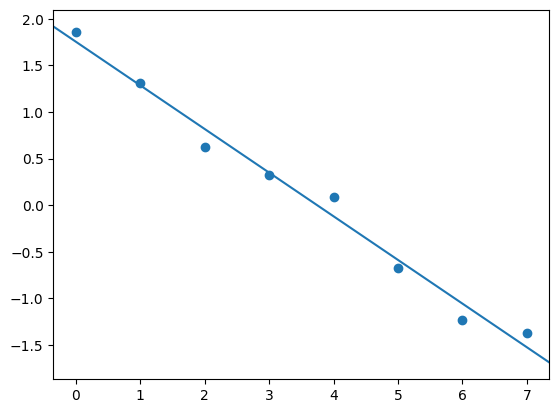

In [43]:
regression_plot(x,y,b,m)

In [45]:
m.item()

-0.4681258499622345

In [46]:
b.item()

1.7542961835861206

###**Exercise**

In [47]:
def f(x):
  return x**2 + 2*x + 2

In [48]:
x= torch.tensor([2.]).requires_grad_()
x

tensor([2.], requires_grad=True)

In [49]:
# compute y = f(x)

y = f(x)
y

tensor([10.], grad_fn=<AddBackward0>)

In [50]:
#perform autodiff to compute derivative dy/dx

y.backward()

In [51]:
#extract the gradient(slope) from the tensor representing dy/dx
slope = x.grad.item()
slope

6.0

In [52]:
y2 = -5 * x + 2

In [53]:
y2

tensor([-8.], grad_fn=<AddBackward0>)

In [112]:
x2 = torch.tensor([1.,2,3,4,5,6,7,8])
y2 = -5 * x2 + 2 + torch.normal(mean = torch.zeros(8),std=0.5)

y2

tensor([ -3.2303,  -7.5685, -12.4965, -18.7281, -23.0047, -28.1293, -32.8747,
        -38.1351])

In [113]:
def reg(x,m,b):
  return m*x + b

In [114]:
m3 = torch.tensor([0.9]).requires_grad_()
b3 =  torch.tensor([0.2]).requires_grad_()
m3,b3

(tensor([0.9000], requires_grad=True), tensor([0.2000], requires_grad=True))

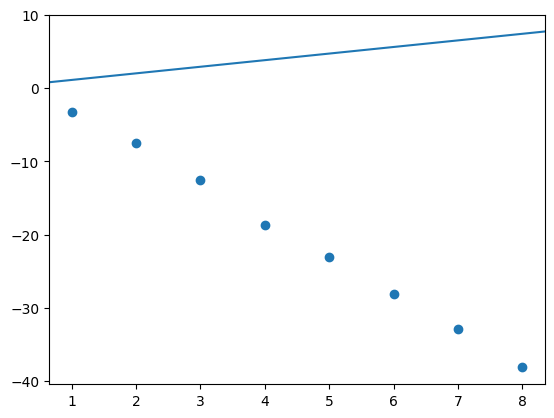

In [115]:
regression_plot(x2,y2,b3,m3)

In [116]:
optim = torch.optim.SGD([m3,b3],lr=0.01)

In [117]:
th = reg(x2,m3,b3)
th

tensor([1.1000, 2.0000, 2.9000, 3.8000, 4.7000, 5.6000, 6.5000, 7.4000],
       grad_fn=<AddBackward0>)

In [118]:
cc = mse(th,y2)
cc

tensor(797.9878, grad_fn=<DivBackward0>)

In [119]:
cc.backward()


In [120]:
m3.grad

tensor([285.1430])

In [121]:
b3.grad

tensor([49.5418])

In [122]:
optim.step()

In [123]:
m3

tensor([-1.9514], requires_grad=True)

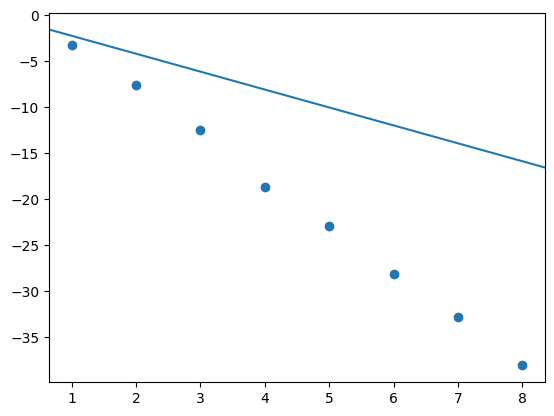

In [124]:
regression_plot(x2,y2,b3,m3)

In [125]:
epochs = 500
for epoch in range(epochs):
  optim.zero_grad()

  #step 1: forward pass
  yh = reg(x2,m3,b3)

  #step 2: calculate loss
  c1 = mse(yh,y2)

  #step3: calculate gradient of C wrt parameters. using autodiff
  c1.backward()

  #step 4: reduce the cost
  optim.step()

  print('Epoch {}, cost {}, m grad {}, b grad {}'.format(epoch,'%3g'%c1,'%.3g'%m3.grad,'%.3g'%b3.grad))


Epoch 0, cost 180.669, m grad 135, b grad 22.9
Epoch 1, cost 41.9671, m grad 64.2, b grad 10.3
Epoch 2, cost 10.7948, m grad 30.5, b grad 4.27
Epoch 3, cost 3.78132, m grad 14.6, b grad 1.44
Epoch 4, cost 2.1956, m grad 7.02, b grad 0.0965
Epoch 5, cost 1.82942, m grad 3.43, b grad -0.537
Epoch 6, cost 1.73731, m grad 1.73, b grad -0.835
Epoch 7, cost 1.70686, m grad 0.922, b grad -0.974
Epoch 8, cost 1.69033, m grad 0.539, b grad -1.04
Epoch 9, cost 1.67701, m grad 0.358, b grad -1.06
Epoch 10, cost 1.66449, m grad 0.271, b grad -1.08
Epoch 11, cost 1.65222, m grad 0.23, b grad -1.08
Epoch 12, cost 1.64009, m grad 0.21, b grad -1.08
Epoch 13, cost 1.62805, m grad 0.2, b grad -1.08
Epoch 14, cost 1.61612, m grad 0.195, b grad -1.07
Epoch 15, cost 1.60428, m grad 0.192, b grad -1.07
Epoch 16, cost 1.59254, m grad 0.19, b grad -1.06
Epoch 17, cost 1.58089, m grad 0.189, b grad -1.06
Epoch 18, cost 1.56934, m grad 0.188, b grad -1.06
Epoch 19, cost 1.55787, m grad 0.187, b grad -1.05
Epoc

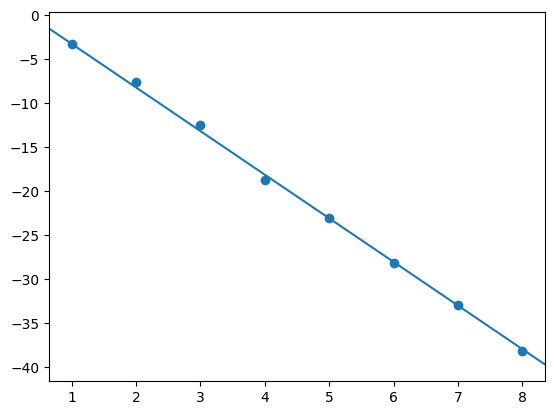

In [126]:
regression_plot(x2,y2,b3,m3)